# AI&데이터 마이닝 6일차 (2020.08.01)

# 6. 데이터의 그룹화(Clustering)
## 계층 클러스터링 (Hierarchical Clustering)
### 개요
- 유사 클러스터들을 계층적 형태로 병합(merge)
- 클러스터의 수는 가장 적합한 계층 수에 의해 결정됨
- 클러스터 수가 주어져야 동작

### 덴드로그램(Dendrogram) (x: 데이터 포인트, y: 거리)


### 덴드로그램 생성 과정
- 모든 데이터 포인트들간의 Distance Matrix (Linkage Matrix)를 구축
- Bottom-up 병합 : 거리가 가장 가까운 데이터포인트들 (또는 데이터포인트-클러스터, 클러스터-클러스터)을 반복적으로 그룹화
- Top-down 분할 : 최초 전체 데이터 포인트가 하나의 그룹에 있고 이를 분할하여 그룹을 생성

#### 클러스터-클러스터 (또는 데이터 포인트) 거리
- Single Linkage (Min Distance)
- Complete Linkage (Max Distance)
- Average Linkage (Group Average Distance)
- Centroid Linkage (Centroid Distance)
- Ward's Linkage : 합쳐진 두 클러스터 내의 모든 데이터 포인트들에 대한 SSE(Sum of Squared Error) 이득
    - SSE : 모든 데이터 포인트들과 센트로이드와의 거리 제곱합

적합한 K = ?
<br>
K를 변경하면서 HCA를 수행하고 실루엣 점수 측정
<br>
HCA의 시간 복잡도 : O(n의3승)<br>
-덴드로그램 생성시간이 대부분

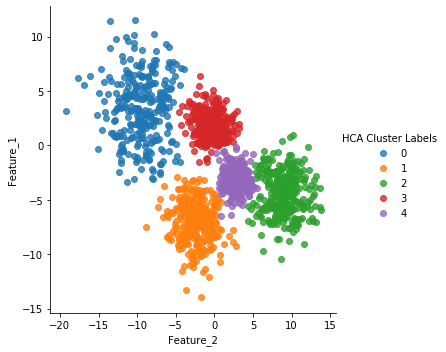

In [8]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets
import seaborn as sns
import pandas as pd


def make_blobs():
    n_samples = 1500
    blobs = datasets.make_blobs(n_samples=n_samples, centers=5, cluster_std=[3.0, 0.9, 1.9, 1.9, 1.3], random_state=51)
    
    df = pd.DataFrame(blobs[0], columns=['Feature_1', 'Feature_2'])
    df.index.name = 'record'
    return df
df = make_blobs()


clus = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

# fit to input data
clus.fit(df)

# get cluster assignments
df['HCA Cluster Labels'] = clus.labels_

sns.lmplot(x='Feature_2', y='Feature_1', hue='HCA Cluster Labels', data=df, fit_reg=False)

최초 구축한 덴드로그램을 저장해서 HCA 반복시 재사용하도록 설정 <br>
memory, compute_full_tree 파라미터

In [9]:
# find optimal number of clusters using silhouette score
# import metrics module
from sklearn import metrics

# generate blob example dataset
df = make_blobs()

# import module and instantiate HCA object
from sklearn.cluster import AgglomerativeClustering

# create list of k values to test and then use for loop
n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num in n_clusters:
    HCA = AgglomerativeClustering(n_clusters=num, affinity='euclidean', linkage='ward', memory='./model_storage/dendrogram', compute_full_tree=True)
    cluster_labels = HCA.fit_predict(df) # HCA.fit(df); cluster_labels=HCA.labels_
    S = metrics.silhouette_score(df, cluster_labels)
    print("n_clusters = {:d}, silhouette score {:1f}".format(num, S))

n_clusters = 2, silhouette score 0.491869
n_clusters = 3, silhouette score 0.445017
n_clusters = 4, silhouette score 0.514050
n_clusters = 5, silhouette score 0.540089
n_clusters = 6, silhouette score 0.512037
n_clusters = 7, silhouette score 0.506730
n_clusters = 8, silhouette score 0.476728


### 덴드로그램 그리기
- Scikit-learn, Seaborn으로는 아직 덴드로그램을 잘 그릴 수 없음
- SciPy(Science Python) 라이브러리를 이용

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [115.0, 115.0, 125.0, 125.0],
  [92.5, 92.5, 120.0, 120.0],
  [70.0, 70.0, 106.25, 106.25],
  [55.0, 55.0, 88.125, 88.125],
  [32.5, 32.5, 71.5625, 71.5625],
  [10.0, 10.0, 52.03125, 52.03125],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [135.0, 135.0, 152.5, 152.5],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [175.0, 175.0, 193.75, 193.75],
  [143.75, 143.75, 184.375, 184.375],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [225.0, 225.0, 243.75, 243.75],
  [164.0625, 164.0625, 234.375, 234.375],
  [31.015625, 31.015625, 199.21875, 199.21875],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [275.0, 275.0, 292.5, 292.5],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 32

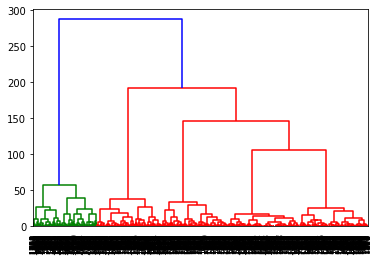

In [10]:
from scipy.cluster import hierarchy

# Calculate the distance between each sample
Z = hierarchy.linkage(df, 'ward')

# Plot with Custom leaves (scroll down in consol to see plot)
hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=df.index)

## 밀도 클러스터링 (Density Clustering)
### 개요
- 밀도(주어진 공간의 데이터 포인트 수)를 척도로 클러스터링 수행
- 밀집된 영역 바깥의 데이터는 클러스터에서 제거하는 방식으로 잡음(noise)제거에 매우 효과적
- 사전에 k가 주어질 필요 없음

### DBSCAN(Density-Based Spatial Clustering of Applications with Noise)
- 대표적인 밀도 클러스터링 방법
- epsilon, min_samples를 입력으로 하여 동작
    - Epsilon : 거리(밀도를 계산할 범위 지정)
    - min_samples : 최소 데이터 포인트 수
- 데이터 포인트들은 코어(Core)포인트, 경계(Border)포인트, 잡음(Noise)포인트로 구분
    - 코어 포인트 : epsilon 안에 min_samples 이상의 아웃 데이터 포인트가 있는 데이터 포인트
    - 경계 포인트 : 코어 포인트의 이웃 데이터 포인트
    - 잡음 포인트 : 코어, 경계가 아닌 데이터 포인트

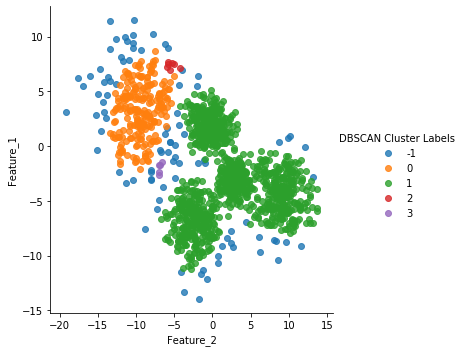

In [13]:
df = make_blobs()

from sklearn.cluster import DBSCAN
clus = DBSCAN(eps=0.9, min_samples=5, metric='euclidean')

# fit to input data
clus.fit(df)

# get cluster assignments
df['DBSCAN Cluster Labels'] = clus.labels_

sns.lmplot(x='Feature_2', y='Feature_1', hue='DBSCAN Cluster Labels', data=df, fit_reg=False)

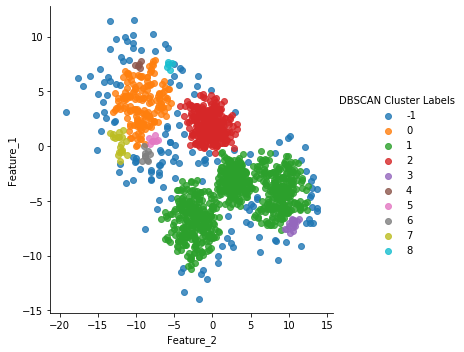

In [14]:
df = make_blobs()

from sklearn.cluster import DBSCAN
clus = DBSCAN(eps=0.7, min_samples=5, metric='euclidean')

# fit to input data
clus.fit(df)

# get cluster assignments
df['DBSCAN Cluster Labels'] = clus.labels_

sns.lmplot(x='Feature_2', y='Feature_1', hue='DBSCAN Cluster Labels', data=df, fit_reg=False)

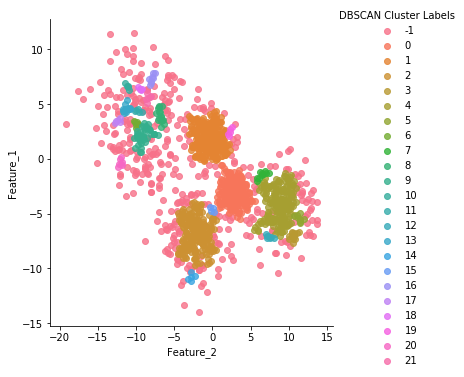

In [15]:
df = make_blobs()

from sklearn.cluster import DBSCAN
clus = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')

# fit to input data
clus.fit(df)

# get cluster assignments
df['DBSCAN Cluster Labels'] = clus.labels_

sns.lmplot(x='Feature_2', y='Feature_1', hue='DBSCAN Cluster Labels', data=df, fit_reg=False)

## 스펙트럴 클러스터링 (Spectral Clustering)
### 개요
- 클러스터를 구성하는 노드의 연결성에 기반해서 연결 그래프를 생성하고 데이터 포인트를 그룹화
- 사전에 클러스터 수가 주어져야 동작
- 데이터 포인트들의 응집성(Compactness)가 아닌 연결성(Connectivity)에 중점을 둔 클러스터링 방식

### 동작과정
- 유사도 그래프 생성
    - 유사도 행렬(Affinity Matrix) 구축 : 각 데이터 포인터와 나머지 데이터 포인트들간의 관련성을 비교
    - Epsilon-이웃(Neightborhood), k-최근접 이웃(Nearest neighbor) 이용하여 관련성 계산
- 유사도 행렬 공간에서 클러스터링 수행
    - 주성분분석(PCA) 방법 등을 이용하여 저차원으로 변환하기도 함
    - 저차원으로 변환된 데이터에 대해 클러스터링(k-Means 클러스터링 등 이용)

C:\Users\dongi\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


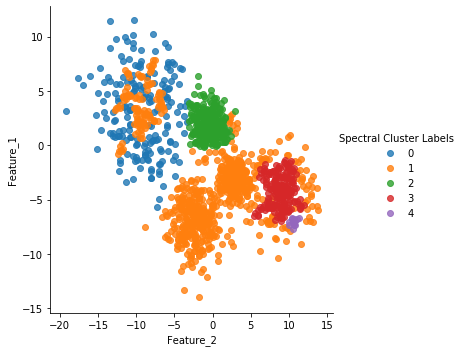

In [19]:
from sklearn.cluster import SpectralClustering
clus = SpectralClustering(n_clusters=5, random_state=42, assign_labels='kmeans', n_init=10, affinity='nearest_neighbors', n_neighbors=10)

# fit to input data
clus.fit(df)

# get cluster assignments
df['Spectral Cluster Labels'] = clus.labels_

sns.lmplot(x='Feature_2', y='Feature_1', hue='Spectral Cluster Labels', data=df, fit_reg=False)